In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df=pd.read_csv(r'HousingData.csv')
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [4]:
corr_matrix = df.corr()
print(corr_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.191178  0.401863 -0.054355  0.417130 -0.219150  0.354342   
ZN      -0.191178  1.000000 -0.531871 -0.037229 -0.513704  0.320800 -0.563801   
INDUS    0.401863 -0.531871  1.000000  0.059859  0.764866 -0.390234  0.638431   
CHAS    -0.054355 -0.037229  0.059859  1.000000  0.075097  0.104885  0.078831   
NOX      0.417130 -0.513704  0.764866  0.075097  1.000000 -0.302188  0.731548   
RM      -0.219150  0.320800 -0.390234  0.104885 -0.302188  1.000000 -0.247337   
AGE      0.354342 -0.563801  0.638431  0.078831  0.731548 -0.247337  1.000000   
DIS     -0.374166  0.656739 -0.711709 -0.093971 -0.769230  0.205246 -0.744844   
RAD      0.624765 -0.310919  0.604533  0.001468  0.611441 -0.209847  0.458349   
TAX      0.580595 -0.312371  0.731055 -0.032304  0.668023 -0.292048  0.509114   
PTRATIO  0.281110 -0.414046  0.390954 -0.111304  0.188933 -0.355501  0.269226   
B       -0.381411  0.171303 

In [6]:
high_correlations = corr_matrix['MEDV'][abs(corr_matrix['MEDV'])>0.6].index
print(high_correlations)

Index(['RM', 'LSTAT', 'MEDV'], dtype='object')


In [7]:
for column in high_correlations:
    df[column]=df[column].fillna(df[column].mean())

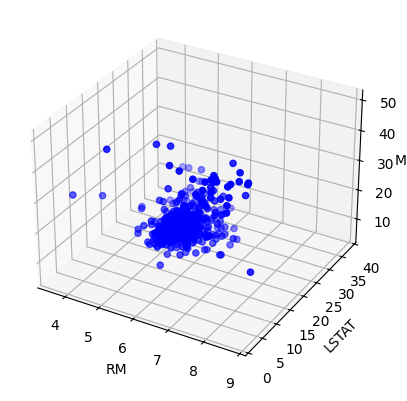

In [8]:
feature1, feature2 = high_correlations[0], high_correlations[1]  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[feature1], df[feature2], df['MEDV'], c='b', marker='o')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('MEDV')
plt.show()

In [9]:
X = df[high_correlations.drop('MEDV')]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(X_test)
print(y_test)

        RM  LSTAT
173  6.416   9.04
274  6.758   3.53
491  5.983  18.07
72   6.065   5.52
452  6.297  17.27
..     ...    ...
412  4.628  34.37
436  6.461  18.05
411  6.657  21.22
86   6.015  12.86
75   6.286   8.94

[102 rows x 2 columns]
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64


In [11]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
print('///////////////////')
print(X_train_scaled)
# Check the output

///////////////////
[[0.29306488 0.63962472]
 [0.40085418 0.18598234]
 [0.44091926 0.1683223 ]
 [0.45556233 0.59492274]
 [0.37909294 0.26352097]
 [0.52226968 0.09243929]
 [0.44213952 0.17328918]
 [0.51250763 0.11147903]
 [0.46552776 0.68211921]
 [0.60789099 0.49806843]
 [0.49766118 0.13852097]
 [0.46390075 0.21302428]
 [0.67114094 0.12775938]
 [0.47691682 0.37086093]
 [0.79357332 0.16087196]
 [0.35306081 0.40783664]
 [0.37502542 0.28366446]
 [0.53243848 0.12775938]
 [0.35184055 0.29718543]
 [0.53365874 0.11506623]
 [0.42586943 0.52124724]
 [0.4388855  0.23647903]
 [0.46898515 0.11258278]
 [0.44295302 0.1647351 ]
 [0.53955664 0.12775938]
 [0.66951393 0.0852649 ]
 [0.46552776 0.36672185]
 [0.804759   0.05601545]
 [0.35590807 0.7044702 ]
 [0.50233882 0.15480132]
 [0.44925768 0.31208609]
 [0.4533252  0.42384106]
 [0.2690665  0.73371965]
 [0.52104942 0.28421634]
 [0.44661379 0.18708609]
 [0.60056945 0.06125828]
 [0.55745373 0.07312362]
 [0.41915802 0.40204194]
 [0.43258084 0.35706402]
 [0.5

In [13]:
from sklearn.linear_model import SGDRegressor

In [26]:
learning_rates = [0.01, 0.001, 0.0001]
losses = {} 
metrics = {}

In [27]:
for lr in learning_rates:
    sgdr = SGDRegressor(learning_rate='invscaling', eta0=lr, max_iter=1, tol=None, warm_start=True)
    current_losses = []
    
    for i in range(1000):  # Manually iterate up to 1000 times
        sgdr.partial_fit(X_train_scaled, y_train)  # Perform one iteration
        y_pred = sgdr.predict(X_train_scaled)
        mse = mean_squared_error(y_train, y_pred)
        current_losses.append(mse)
        
        if len(current_losses) > 1 and abs(current_losses[-1] - current_losses[-2]) < 1e-6:
            break  # Early stopping if loss change is very small
    losses[lr] = current_losses
    y_test_pred = sgdr.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)
    
    metrics[lr] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2
    }
    print(f"Learning rate {lr}:\n MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2: {r2}\n")

Learning rate 0.01:
 MAE: 3.8814719916223797, MSE: 31.266684810472896, RMSE: 5.591662079424408, R^2: 0.5736387315227227

Learning rate 0.001:
 MAE: 4.017848320959369, MSE: 34.78665992038144, RMSE: 5.89802169548243, R^2: 0.5256393653613841

Learning rate 0.0001:
 MAE: 5.616002555889701, MSE: 65.90996723873388, RMSE: 8.118495380224951, R^2: 0.10123323251112071



Plot convergence graphs

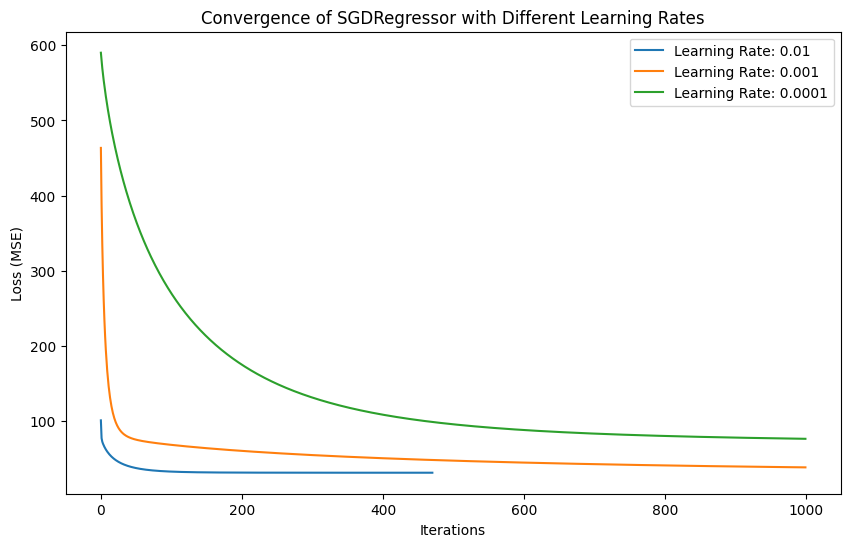

In [28]:
plt.figure(figsize=(10, 6))
for lr, loss in losses.items():
    plt.plot(loss, label=f'Learning Rate: {lr}')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Convergence of SGDRegressor with Different Learning Rates')
plt.legend()
plt.show()

In [29]:
best_lr = min(metrics, key=lambda lr: metrics[lr]['MSE'])
print(f"Best model: Learning Rate = {best_lr}")

Best model: Learning Rate = 0.01


In [30]:
sgdr_best = SGDRegressor(learning_rate='invscaling', eta0=best_lr, max_iter=1000)
sgdr_best.fit(X_train_scaled, y_train)

SGDRegressor()

In [31]:
x1_range = np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 100) #Feauture 1
x2_range = np.linspace(X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max(), 100) #Feauture 2
#hadi derna bach n9dro n5rj l fueature w nprintohom
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]

In [32]:
y_grid_pred = sgdr_best.predict(grid_points)
y_grid_pred = y_grid_pred.reshape(x1_grid.shape)

Plotting the 3D surface plot

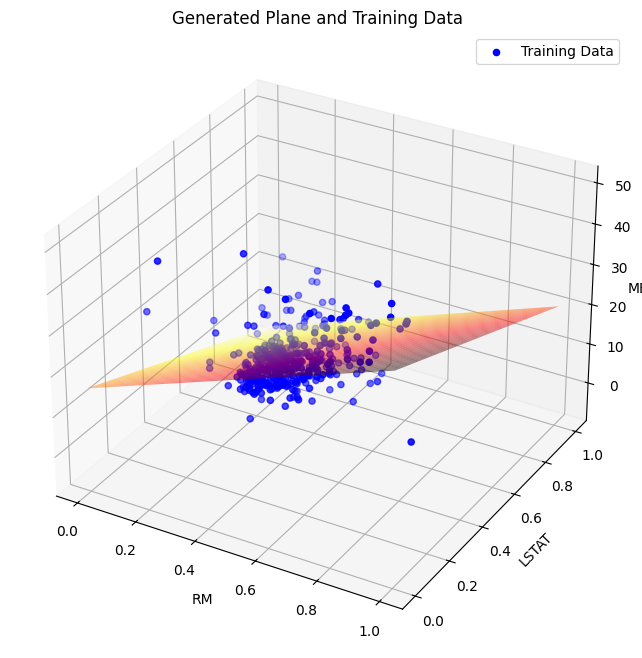

In [37]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train, color='blue', label='Training Data')
ax.plot_surface(x1_grid, x2_grid, y_grid_pred, alpha=0.5, cmap='hot_r')
ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
ax.set_title('Generated Plane and Training Data')
plt.legend()
plt.show()

Plot the generated plane (model predictions) over the grid

C:\Users\fethi tech\AppData\Local\Temp\ipykernel_11184\28477654.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


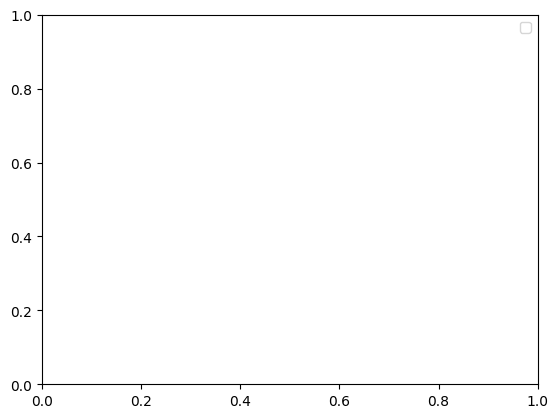

Labels and title

C:\Users\fethi tech\AppData\Local\Temp\ipykernel_11184\2494873704.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


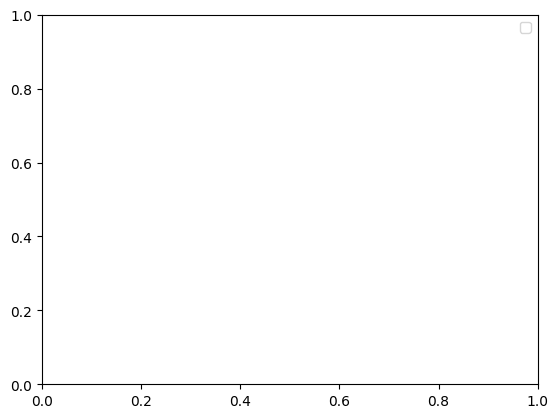

tol : The tolerance for early stopping is set by the tol option. <br>
If the improvement in the loss function between iterations is less than this value, training will end. <br>
By terminating training early when more optimization does not yield a discernible improvement in the model, <br>
one can minimize training time and avoid overfitting.

In [40]:
sample = np.array([[5.713, 22.6]])

In [41]:
sample_sacled= scaler.transform(sample)
predicted_class = sgdr_best.predict(sample_sacled)
print(f"Predicted class for the sample: {predicted_class}")

Predicted class for the sample: [13.47728647]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
